In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [5]:
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# delete a column
df=df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#to displlay stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [11]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

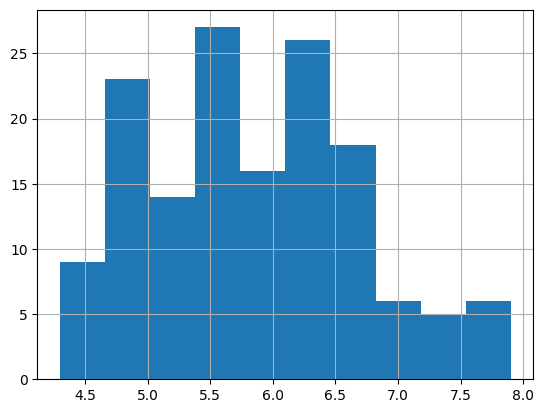

In [12]:
# histogram
df['SepalLengthCm'].hist()

<Axes: >

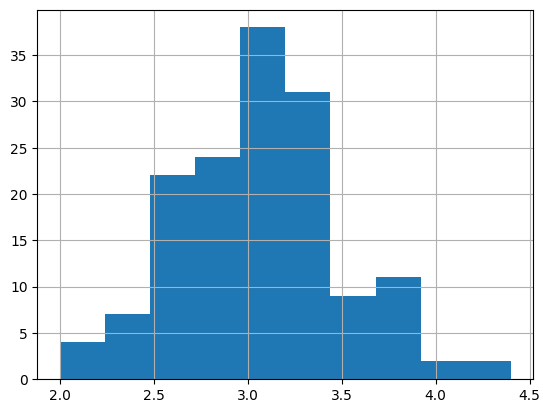

In [13]:
df['SepalWidthCm'].hist()

<Axes: >

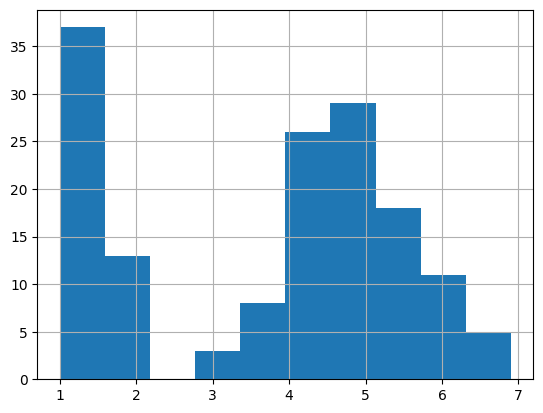

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

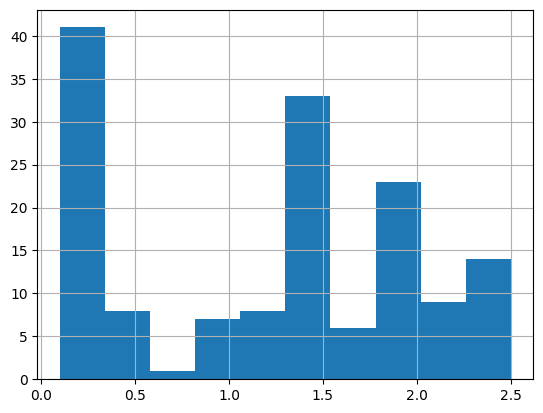

In [15]:
df['PetalWidthCm'].hist()

In [16]:
# scatterplot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

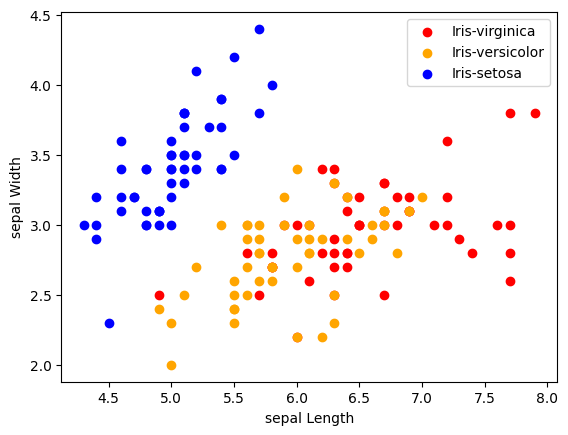

In [20]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("sepal Width")
plt.legend()

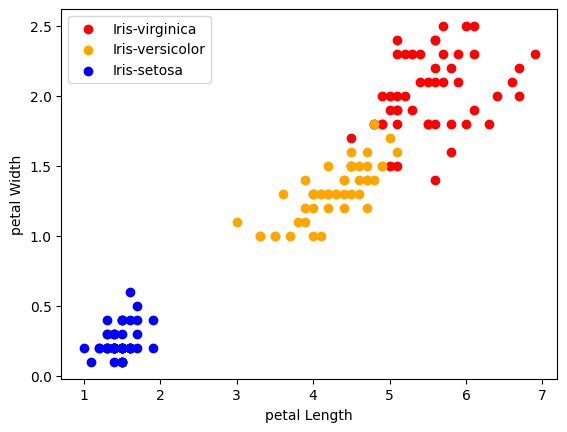

In [21]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

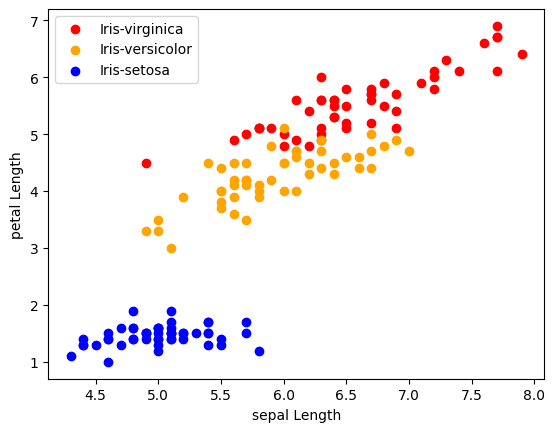

In [23]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("petal Length")
plt.legend() 

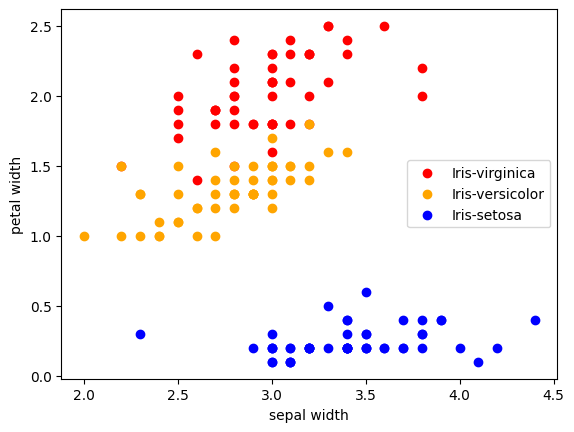

In [25]:
for i in range(3):
    x=df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

# coorelation matrix

In [31]:
df=df.drop(columns = ['Species']) # to avoid error: could not convert string to float: 'Iris-setosa'
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

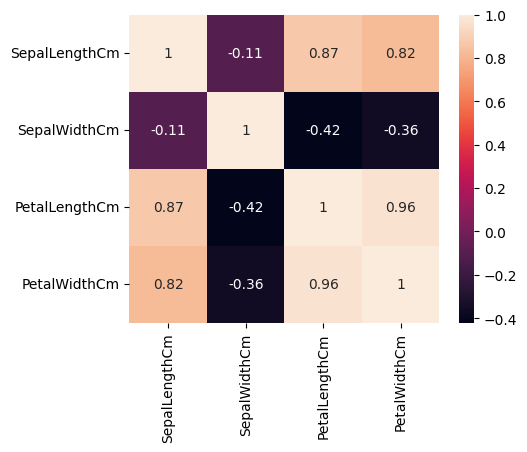

In [32]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

# Labe Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
# Reload data to include 'species'
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [39]:
df=df.drop(columns = ['Id'])

In [40]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [102]:
from sklearn.model_selection import train_test_split
# train = 70 , test = 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)

In [92]:
# model taining
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [105]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [94]:
#knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [95]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [97]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [98]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [104]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0
